In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
pn.extension()
pn.extension('plotly')
import hvplot.pandas
import plotly.express as px

c:\Users\Tia\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Tia\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Tia\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ModuleNotFoundError: No module named 'panel'

In [2]:
df = pd.read_csv('tweetActivity.csv')

In [3]:
df

Date  Tweets published  impressions  engagements  engagement rate  \
0   2023-10-01                 0          947           57         0.060190   
1   2023-10-02                 0          838           42         0.050119   
2   2023-10-03                 0         1838          138         0.075082   
3   2023-10-04                 0         6849          238         0.034750   
4   2023-10-05                 0        14512         5364         0.369625   
5   2023-10-06                 0         8908          134         0.015043   
6   2023-10-07                 0         8688          101         0.011625   
7   2023-10-08                 0         3605           49         0.013592   
8   2023-10-09                 0         2184          131         0.059982   
9   2023-10-10                 0         1934           91         0.047053   
10  2023-10-11                 0         3255          150         0.046083   
11  2023-10-12                 0         1988         1489         0.748994   
12  2023-10-13                 0          459           34         0.074074   
13  2023-10-14                 0          792          564         0.712121   
14  2023-10-15                 0          611         1489         2.436989   
15  2023-10-16                 0          617         2208         3.578606   
16  2023-10-17                 0         3775          240         0.063576   
17  2023-10-18                 0         1741          221         0.126939   
18  2023-10-19                 0         3697          486         0.131458   
19  2023-10-20                 0         5581         1625         0.291166   
20  2023-10-21                 0         2987          962         0.322062   
21  2023-10-22                 0         3313          750         0.226381   
22  2023-10-23                 0         2145          565         0.263403   
23  2023-10-24                 0         3650          789         0.216164   
24  2023-10-25                 0         2808          536         0.190883   
25  2023-10-26                 0         2705          379         0.140111   
26  2023-10-27                 1         1975          449         0.227342   
27  2023-10-28                 2         2608          511         0.195936   
28  2023-10-29                 0         1525          269         0.176393   

    retweets  replies  likes  user profile clicks  url clicks  ...  \
0          0        5      7                   12           0  ...   
1          4        1      5                   11           0  ...   
2         10        1     33                   27           3  ...   
3         26        7     41                   39          10  ...   
4         47        4     83                   14          12  ...   
5         13        6     15                   41           6  ...   
6         11        2     13                   12          11  ...   
7          2        3      8                    7           5  ...   
8          6        5     27                   18           7  ...   
9          4        6     20                   20           6  ...   
10        10        6     20                   24          13  ...   
11         2        5     14                   12           3  ...   
12         1        2      4                    6           4  ...   
13         4        1     37                    6           3  ...   
14         2        0     52                    8           0  ...   
15         2        0     88                    6           6  ...   
16         7        5    121                   52           2  ...   
17        18       15     86                   17           1  ...   
18        57       30     97                   62          38  ...   
19       384       16    502                   77          96  ...   
20       246        6    315                   22          26  ...   
21       199        2    269                   20           4  ...   
22       125        5    204 

In [4]:
df.columns
idf = df.interactive()

In [5]:
# Data vs Impression 
Line_Chart = df.hvplot.line(x='Date', y='impressions', xlabel='Date', ylabel='Impressions',
                           title='Time Series Analysis of Impressions Over Time', width=950, height=600)

In [6]:
#Retweets, Likes and Replies
retweets = 'retweets' 
likes = 'likes'  
replies = 'replies' 

Bubble_Chart = df.hvplot.scatter(
    x='retweets',
    y='likes',
    c='blue',
    marker='o',
    size=(df['replies'] * 10),  
    xlabel='Retweets',
    ylabel='Likes',
    title='Engagement Analysis: Retweets, Likes, and Replies',
    width=950,
    height=600,
)

In [7]:
# Engagement over Time
engagement_metrics = ['retweets', 'likes', 'replies', 'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands']

Line_Chart1 = px.line(df, x='Date', y=engagement_metrics, title='Time Series Analysis of Multiple Engagement Metrics',width=950, height=650)

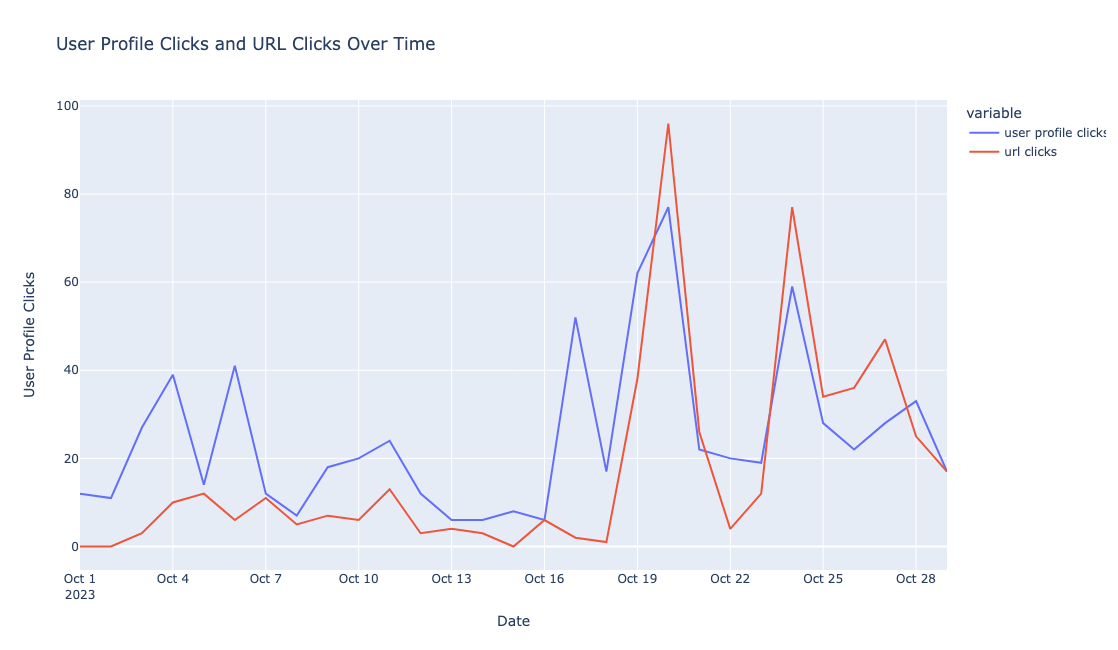

In [8]:
#profile clicks and url clicks over time
import plotly.express as px

Line_Chart2 = px.line(df, x='Date', y=['user profile clicks', 'url clicks'], title='User Profile Clicks and URL Clicks Over Time',width=950, height=650)


Line_Chart2.update_layout(yaxis=dict(title='User Profile Clicks', side='left'), yaxis2=dict(title='URL Clicks', overlaying='y', side='right'))

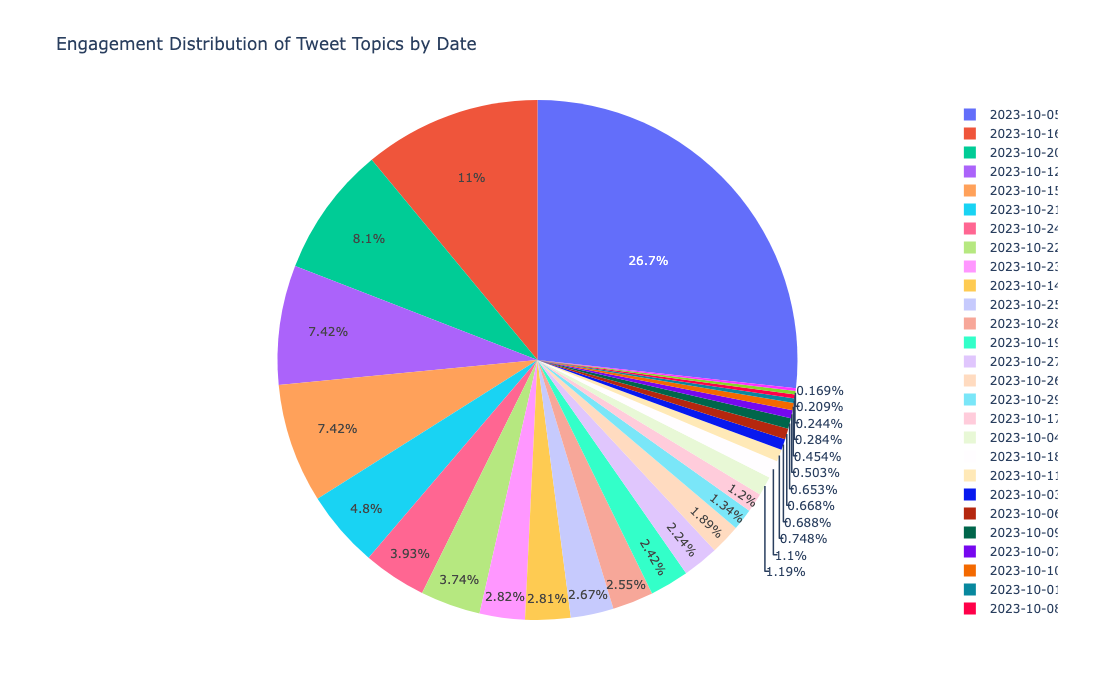

In [9]:
# Assuming you have a DataFrame named 'df' with columns 'Tweet Topic' and 'Total Engagements'
Pie_Chart = px.pie(df, names='Date', values='engagements', title='Engagement Distribution of Tweet Topics by Date')
Pie_Chart.update_layout(height=700, width=950)

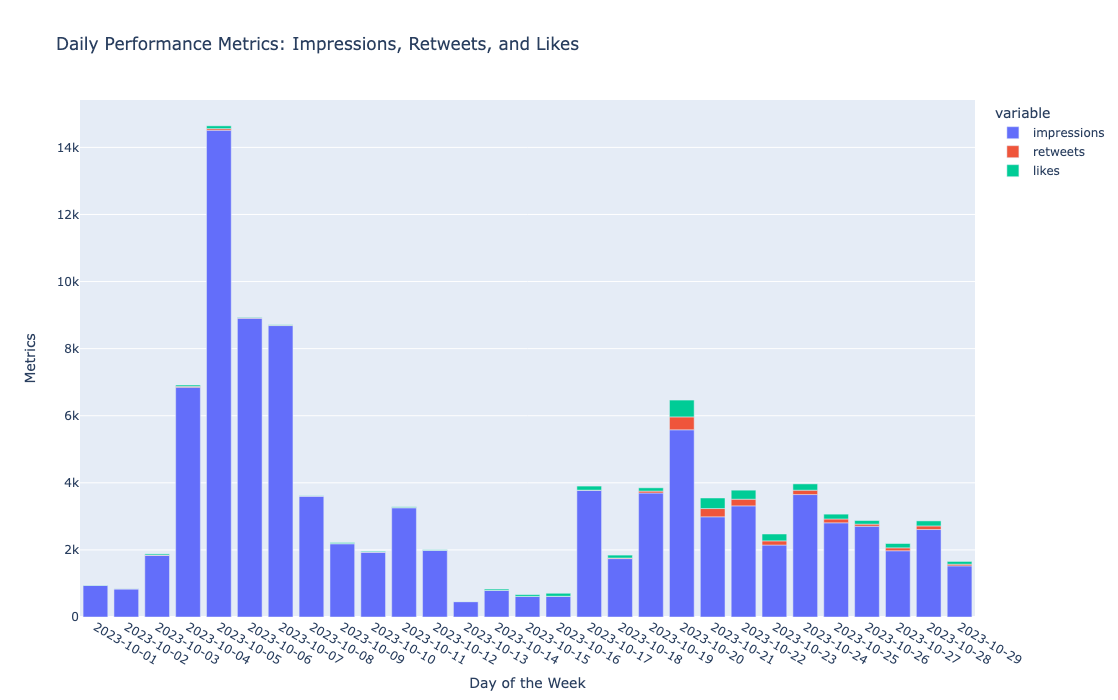

In [10]:
# impressions, retweets, or likes for each day of the week
Bar_Chart = px.bar(df, x='Date', y=['impressions', 'retweets', 'likes'],
             labels={'Date': 'Day of the Week', 'value': 'Metrics'},
             title='Daily Performance Metrics: Impressions, Retweets, and Likes')

# Customize the layout as needed
Bar_Chart.update_layout(xaxis=dict(type='category'),width=1000,  
    height=700   )

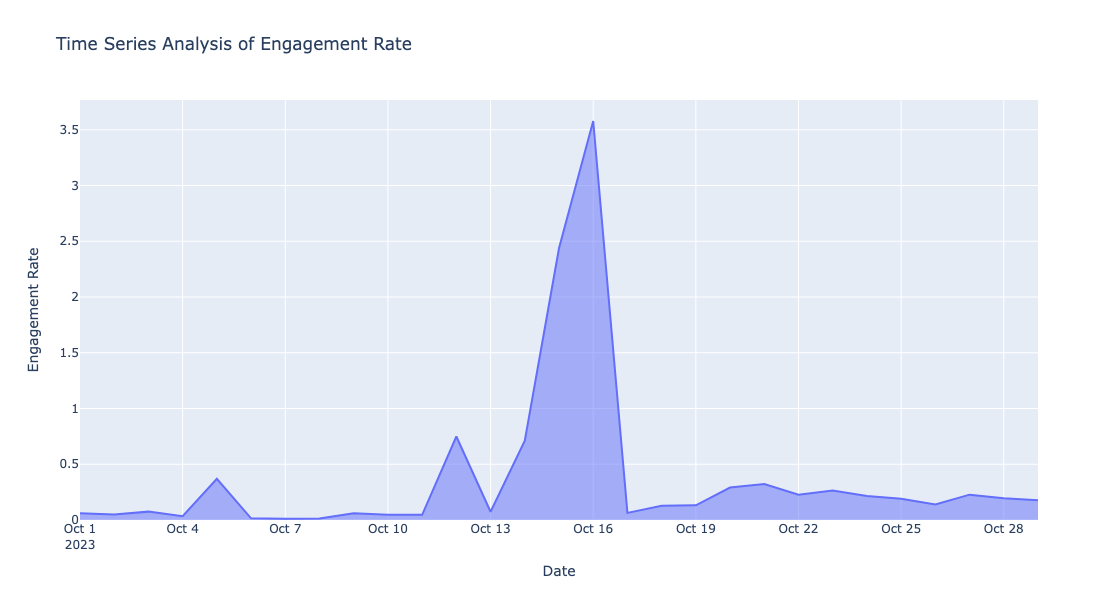

In [11]:
#Engagement rate vs time 
Area_Chart = px.area(df, x='Date', y='engagement rate', title='Time Series Analysis of Engagement Rate')

# Customize the layout as needed
Area_Chart.update_layout(
    xaxis_title='Date',
    yaxis_title='Engagement Rate',
    width=1000,  
    height=600 
)

In [12]:
# Facebook ads charts
start_row = 0 
end_row = 199  
fd = pd.read_csv('FacebookAds.csv', nrows=end_row - start_row + 1, skiprows=range(1, start_row))
fd

AdID                                             AdText  Clicks  \
0     374            Join us because we care. Black matters.     0.0   
1     655  NOT EVERY BOY WANTS TO BE A SOLDIER. A beautif...    35.0   
2     664  "People can tolerate two homosexuals they see ...    26.0   
3      79                      ?????? ??? ????? ? ??????????     0.0   
4     325  California... knows how to party California......     4.0   
..    ...                                                ...     ...   
195   405  We can be heard only when we stand together. B...     0.0   
196   407  We can be heard only when we stand together. B...     0.0   
197   413  Poet, Phyllis Wheatley, born into slavery in 1...     0.0   
198   414                                      Black Matters     4.0   
199   415  Florida police department used black men's mug...     0.0   

     Impressions       Age              CreationDate  \
0          137.0  18 - 65+  06/10/15 02:59:53 AM PDT   
1          452.0  18 - 65+  06/23/15 07:04:01 AM PDT   
2          374.0  18 - 65+  06/23/15 07:02:40 AM PDT   
3           31.0  18 - 65+  06/09/15 03:50:21 AM PDT   
4          326.0  18 - 65+  06/10/15 07:34:52 AM PDT   
..           ...       ...                       ...   
195          0.0  18 - 65+  07/02/15 03:10:36 AM PDT   
196          0.0  18 - 65+  07/02/15 03:10:36 AM PDT   
197          0.0  18 - 65+  07/06/15 07:51:06 AM PDT   
198         67.0  18 - 65+  07/06/15 07:51:49 AM PDT   
199          0.0  18 - 65+  07/06/15 07:52:07 AM PDT   

                      EndDate  \
0                         NaN   
1    06/24/15 07:04:00 AM PDT   
2    06/24/15 07:02:39 AM PDT   
3    06/11/15 03:48:00 AM PDT   
4    06/11/15 07:34:51 AM PDT   
..                        ...   
195                       NaN   
196                       NaN   
197  07/07/15 07:51:05 AM PDT   
198  07/08/15 06:08:00 PM PDT   
199  07/07/15 09:07:00 AM PDT   

                                           LandingPage  \
0    https://www.facebook.com/Black-Matters-1579673...   
1    https://www.facebook.com/LGBT-United-839497472...   
2    https://www.facebook.com/LGBT-United-839497472...   
3    https://www.facebook.com/pages/L-for-life/9949...   
4    https://www.facebook.com/Black-Matters-1579673...   
..                                                 ...   
195  https://www.facebook.com/Black-Matters-1579673...   
196  https://www.facebook.com/Black-Matters-1579673...   
197  https://www.facebook.com/Black-Matters-1579673...   
198  https://www.facebook.com/Black-Matters-1579673...   
199  https://www.facebook.com/Black-Matters-1579673...   

                                              Location  Behaviors  ...  \
0    United States: Baltimore (+20 km) Maryland; St...        NaN  ...   
1                             Living In: United States        NaN  ...   
2                             Living In: United States        NaN  ...   
3                                        United States        NaN  ...   
4    United States: Baltimore Maryland; Ferguson, S...        NaN  ...   
..                                                 ...        ...  ...   
195  United States: Atlanta (+20 km) Georgia; Balti...        NaN  ...   
196  United States: Atlanta (+20 km) Georgia; Balti...        NaN  ...   
197  United States: Baltimore Maryland: Ferguson, S...        NaN  ...   
198  United States: Baltimore Maryland: Ferguson, S...        NaN  ...   
199  United States: Baltimore Maryland: Ferguson, S...        NaN  ...   

                       ExcludedConnections Gender Generation Politics  \
0    Exclude people who like Black Matters    NaN        NaN      NaN   
1                                      NaN    NaN        NaN      NaN   
2                                      NaN    NaN        NaN      NaN   
3       Exclude people who like L for life    NaN        NaN      NaN   
4                                      NaN    NaN        NaN      NaN   
..                                     ...    

In [13]:
fd.columns

Index(['AdID', 'AdText', 'Clicks', 'Impressions', 'Age', 'CreationDate',
       'EndDate', 'LandingPage', 'Location', 'Behaviors', 'Placements',
       'PeopleWhoMatch', 'Interests', 'Language', 'FriendsOfConnections',
       'ExcludedConnections', 'Gender', 'Generation', 'Politics',
       'CustomAudience', 'AdSpend', 'AdSpendCurrency', 'SourceFile',
       'SourceZip', 'pages'],
      dtype='object')

In [14]:
# scatter plot of Clicks vs impressions
scatter_plot = fd.hvplot.scatter(
    x='Impressions',
    y='Clicks',
    title='Facebook Ads Performance: Clicks vs. Impressions Scatter Plot',
    xlabel='Impressions',
    ylabel='Clicks',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot

:Scatter   [Impressions]   (Clicks)

In [15]:
#Line chart for ads spend vs impressions

mean_ad_spend = fd['AdSpend'].mean()
fd['AdSpend'].fillna(mean_ad_spend, inplace=True)


import hvplot.pandas

Line_Chart3 = fd.hvplot.line(
    x='AdSpend',
    y='Impressions',
    title='Facebook Ads Analysis: Ad Spend vs. Impressions Over Time',
    xlabel='Ad Spend',
    ylabel='Impressions',
    width=800,
    height=600,
    line_color='green'
)

# Display the line chart
Line_Chart3

:Curve   [AdSpend]   (Impressions)

In [16]:
#AdSpend vs Clicks line chart
Line_Chart4 = fd.hvplot.line(
    x='AdSpend',
    y='Clicks',
    title='Facebook Ads Analysis: Ad Spend vs. Clicks Over Time',
    xlabel='Ad Spend',
    ylabel='Clicks',
    width=800,
    height=600,
    line_color='red'
)

# Display the line chart
Line_Chart4

:Curve   [AdSpend]   (Clicks)

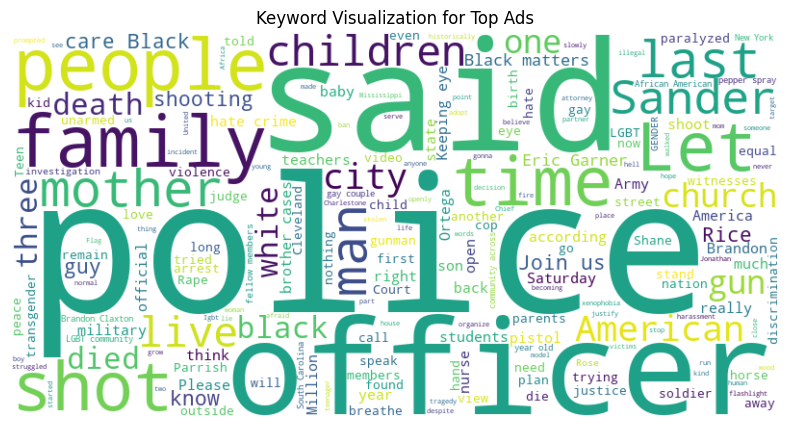

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
# Sort the DataFrame by 'Clicks' in descending order and select the top 20-30 ads
top_ads = fd.sort_values(by='Clicks', ascending=False).head(30)  # Change the range as needed

# Create a word cloud for the 'AdText' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_ads['AdText']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Keyword Visualization for Top Ads")
plt.axis("off")

wordcloud_image_path = 'wordcloud.png'
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(wordcloud_image_path, format='png')

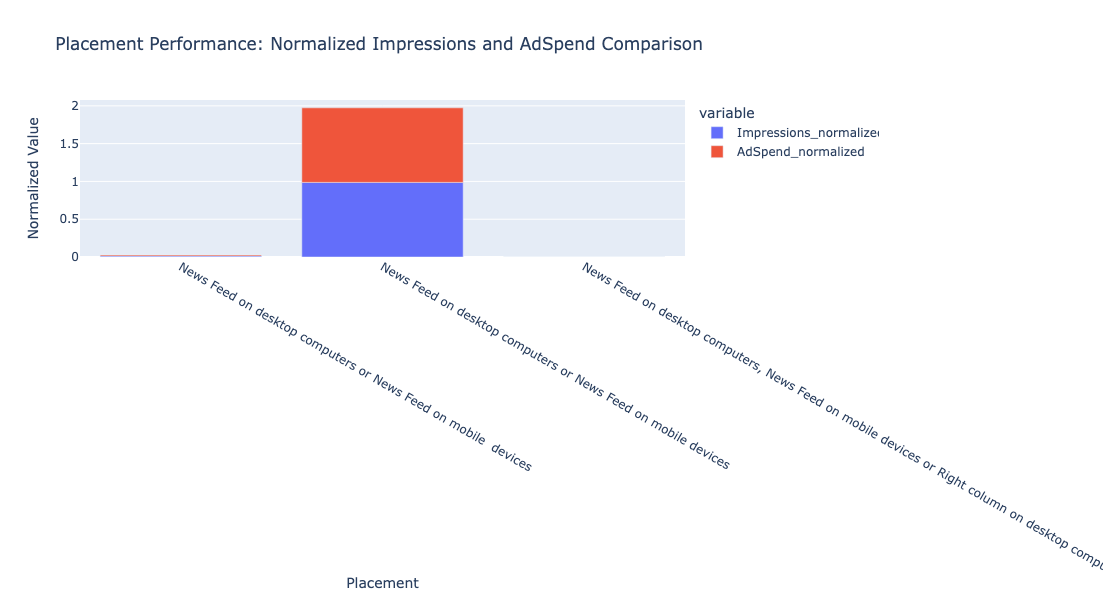

In [18]:
placement_totals = fd.groupby('Placements').agg({'Impressions': 'sum', 'AdSpend': 'sum'}).reset_index()

# Step 2: Normalize the 'Impressions' and 'AdSpend' values
placement_totals['Impressions_normalized'] = placement_totals['Impressions'] / placement_totals['Impressions'].sum()
placement_totals['AdSpend_normalized'] = placement_totals['AdSpend'] / placement_totals['AdSpend'].sum()

# Step 3: Create the bar chart
Bar_Chart1 = px.bar(
    placement_totals,
    x='Placements',
    y=['Impressions_normalized', 'AdSpend_normalized'],
    title='Placement Performance: Normalized Impressions and AdSpend Comparison',
    labels={'Placements': 'Placement', 'value': 'Normalized Value'},
)

# Customize the layout as needed
Bar_Chart1.update_layout(
    xaxis_title='Placement',
    yaxis_title='Normalized Value',
    width=1000,
    height=600
)

In [19]:
import panel as pn

#Line Chart description
LCdescription = """
**Insights:** This line chart illustrates the trend in impressions over time, helping us understand how the visibility or exposure of the content has evolved. It appears that there is a steady increase in impressions until a certain point, followed by a gradual decline. This trend may provide insights into the effectiveness of marketing efforts or the content's popularity.
"""
LCdescription_pane = pn.pane.Markdown(LCdescription)

#Bubble Chart Description
BCDescription = """**Insights:** This bubble chart provides a comprehensive view of user engagement with the content. Each bubble represents a data point, with the X-axis (Retweets) and Y-axis (Likes) showcasing the volume of interactions for each data point. The bubble size (determined by the number of Replies) offers an additional dimension, showing the level of engagement in more detail.
1. Retweets: The X-axis reveals the number of times the content was retweeted. Bubbles positioned farther to the right indicate a higher number of retweets, while those on the left represent fewer retweets.

2. Likes: The Y-axis represents the number of likes received for each data point. Bubbles located higher on the chart signify a greater number of likes, while those lower down have fewer likes.

3. Replies: Bubble size correlates with the number of replies to each data point. Larger bubbles indicate more replies, while smaller bubbles represent fewer replies.

Larger, more prominent bubbles suggest content that sparked significant engagement, while smaller bubbles may indicate areas where engagement can be improved."""

BCdescription_pane = pn.pane.Markdown(BCDescription)

#Line Chart1 Description
LC1description = """
**Insights:** This line chart offers a detailed view of how multiple engagement metrics have evolved over time. It allows us to track the performance and popularity of the content across various metrics, including:

1. Retweets: The indigo blue line represents the number of times content was retweeted. A rising trend indicates increasing retweets over time.

2. Likes: The red line shows the number of likes received, reflecting the content's popularity. An upward trend suggests a growing number of likes.

3. Replies: The green line represents the number of replies to the content. An increasing trend indicates higher user engagement and interaction.

4. User Profile Clicks: The purple line illustrates the number of clicks on user profiles, reflecting user interest in other users. A rising trend suggests an interest in exploring user profiles.

5. URL Clicks: The golden yellow line tracks the number of clicks on URLs included in the content. An upward trend implies increased interest in external links.

6. Hashtag Clicks: The cyan line indicates the number of clicks on hashtags within the content. A rising trend suggests user curiosity about related topics.

7. Detail Expands: The pink line measures the number of times users expanded content to view more details. An increasing trend indicates a desire for deeper engagement

By examining this chart, you can identify trends, peaks, and valleys in different engagement metrics, which can provide valuable insights into the content's performance and user interactions over time. 
"""
LC1description_pane = pn.pane.Markdown(LC1description)

#Line Chart2 Description
LC2description = """
**Insights:** This line chart offers insights into the engagement dynamics over time, specifically focusing on two key interaction metrics: User Profile Clicks and URL Clicks.

1. User Profile Clicks (Left Y-Axis): The left y-axis, represented by the purple line, tracks the number of times users clicked on user profiles associated with the content. A rising trend in user profile clicks suggests an increasing interest in exploring other users' profiles.

2. URL Clicks (Right Y-Axis): The right y-axis, represented by the red line, monitors the number of clicks on URLs included in the content. An upward trend in URL clicks indicates a growing interest in exploring external links.

The dual y-axes allow you to compare the trends in these two engagement metrics simultaneously, despite their potentially different scales. By analyzing this chart, you can identify patterns in user behavior over time and better understand what aspects of your content drive users to interact with user profiles or explore external links."""
LC2description_pane = pn.pane.Markdown(LC2description)

#PieChart Description
PCdescription = """
**Insights:** This pie chart offers insights into how engagements are distributed across different Tweet Topics for each date. Each slice in the pie chart represents a specific date, and the size of each slice indicates the total number of engagements on that date. """
PCdescription_pane = pn.pane.Markdown(PCdescription)


# BarChart Description
BCdescription = """
**Insights:** This bar chart provides a comprehensive overview of daily performance metrics, including Impressions, Retweets, and Likes, organized by the days of the week.

1. X-Axis (Day of the Week): The horizontal axis represents each day of the week, allowing us to track performance patterns over time, with each day being a separate category.

2. Y-Axis (Metrics): The vertical axis represents the performance metrics, which include "Impressions," "Retweets," and "Likes." The height of each bar corresponds to the respective metric's value.

3. Bars: Each bar on the chart represents a specific day of the week and displays the daily performance values for Impressions, Retweets, and Likes. The height of each bar indicates the volume of each metric, providing a visual comparison. 

By examining this chart, we can discern trends and patterns in how daily performance metrics vary throughout the week.
"""
BCdescription_pane = pn.pane.Markdown(BCdescription)

# AreaChart Description
ACdescription = """
**Insights:** This area chart visualizes the engagement rate over time, providing insights into the fluctuations and trends in engagement across different dates.

1. X-Axis (Date): The horizontal axis represents the dates over the period being analyzed. It provides a chronological timeline, allowing us to track changes in engagement rate.

2. Y-Axis (Engagement Rate): The vertical axis measures the "Engagement Rate," which is a key metric that quantifies the level of user interaction, including likes, comments, shares, and other forms of engagement, relative to the total audience.

3. Area Chart: The filled area below the line graph represents the engagement rate at each date, showing how it varies over time. The shaded area highlights the magnitude of engagement.

By examining this area chart, we can draw several important conclusions:

- **Trends and Patterns**: The chart reveals trends and patterns in engagement rate over time, enabling us to identify periods of increased or decreased user interaction. Understanding these trends can help in scheduling content and campaigns during periods of higher engagement.

- **Engagement Peaks**: Peaks in the filled area indicate dates when engagement rates were exceptionally high. Analyzing these peaks can lead to insights into what content or campaigns generated strong audience engagement.
"""
ACdescription_pane = pn.pane.Markdown(ACdescription)

#Scatter Plot
SPdescription = """
**Insights:** his scatter plot provides a visual representation of the relationship between two essential performance metrics for Facebook ads: "Clicks" and "Impressions."

1. X-Axis (Impressions): The horizontal axis represents the number of "Impressions." Impressions signify the number of times the ad was displayed or viewed by Facebook users.

2. Y-Axis (Clicks): The vertical axis measures the "Clicks," which represent the number of times users interacted with the ad by clicking on it.

3. Data Points: Each data point on the scatter plot represents an individual Facebook ad. The position of the point is determined by the ad's performance in terms of both Impressions and Clicks.

By analyzing this scatter plot, we can gain insights into how Facebook ads are performing in terms of user engagement and reach:

- **Scattered Distribution**: The scatter plot shows that the data points are scattered across the chart, indicating a wide range of ad performance. Some ads have a high number of Impressions and Clicks, while others have lower values.

- **Relationship between Impressions and Clicks**: The position of each data point relative to the axes provides insights into the relationship between Impressions and Clicks. Data points in the upper-right portion of the plot represent ads with both high Impressions and Clicks, indicating that these ads are effective in capturing user attention and prompting them to take action.
"""
SPdescription_pane = pn.pane.Markdown(SPdescription)

#Line Chart3 Description
LC3description = """
**Insights:** This line chart illustrates the relationship between "Ad Spend" and "Impressions" over time for Facebook ads.

1. X-Axis (Ad Spend): The horizontal axis represents the amount spent on advertising (Ad Spend) in a given time period. Ad Spend is a critical metric that reflects the financial investment made in running Facebook ad campaigns.

2. Y-Axis (Impressions): The vertical axis measures the number of "Impressions." Impressions indicate how many times the ad was displayed or viewed by Facebook users within the same time period.

This line chart provides insights into how the investment in ad campaigns, as measured by Ad Spend, influences the reach and exposure of Facebook ads, as measured by Impressions:

- **Ad Spend Trend**: The line on the chart represents the trend of Ad Spend over time. Observing the line's direction and magnitude, you can identify whether the budget allocation for Facebook advertising has been consistent, increasing, or decreasing.

- **Impressions Trend**: The chart also displays the trend of Impressions over the same time frame. It shows how often Facebook users have viewed the ads.

- **Budget Planning**: This chart can guide future budget planning and optimization efforts by helping advertisers understand the relationship between Ad Spend and Impressions and fine-tune their advertising strategies accordingly."""

LC3description_pane = pn.pane.Markdown(LC3description)

#Line Chart4 Description
LC4description = """
**Insights:** This line chart illustrates the relationship between "Ad Spend" and "Clicks" over time for Facebook ads.

1. X-Axis (Ad Spend): The horizontal axis represents the amount spent on advertising (Ad Spend) in a given time period. Ad Spend is a key metric that reflects the financial investment made in running Facebook ad campaigns.

2. Y-Axis (Clicks): The vertical axis measures the number of "Clicks." Clicks represent the actions taken by Facebook users when they interact with the ad, such as clicking on the ad to learn more or take a specific action, like visiting a website.

This line chart provides insights into how the investment in ad campaigns, as measured by Ad Spend, impacts user engagement, as measured by Clicks:

- **Clicks Trend**: The chart displays the trend of Clicks, indicating how user interactions with the ads have evolved over the same time frame. Clicks are a critical engagement metric because they reflect the effectiveness of the ad in driving user actions."""
LC4description_pane = pn.pane.Markdown(LC4description)

#Word Cloud Description
WCdescription = """
**Insights:** This word cloud provides a visual representation of the most prominent keywords or phrases found in the top-performing ads based on the number of 'Clicks' they have received.

1. Keyword Visualization: The word cloud uses various font sizes to depict the relative frequency of specific keywords or phrases within the text of the top ads. Larger and bolder words indicate that those words are more prevalent in the ad content.

2. Top Ads Selection: The word cloud is generated from a selection of the top-performing ads, which have received a high number of 'Clicks.' These top ads are likely to be the most engaging and effective in attracting user interactions.

Interpretation

- **Keyword Prominence**: The larger and bolder words in the word cloud represent the keywords or phrases that appear frequently in the text of the top ads. These are the words that have captured the attention of the audience and led to a high number of Clicks.

- **Ad Content Themes**: By examining the prominent words and phrases, advertisers and marketers can gain insights into the common themes and topics that resonate with their target audience. This information can help in refining ad content and messaging strategies.

- **Optimizing Ad Copy**: Understanding which words or phrases are most associated with high Click rates allows advertisers to optimize their ad copy to focus on these engaging elements.

- **Data-Driven Decision-Making**: The word cloud aids advertisers in making data-driven decisions about ad content and copywriting by emphasizing the most influential keywords and phrases.
"""
WCdescription_pane = pn.pane.Markdown(WCdescription)

#Bar Chart1 Description
BC1description = """
**Insights:** This bar chart provides a comparative analysis of different ad placements based on normalized impressions and ad spend. It allows advertisers to evaluate the effectiveness of various ad placements in terms of impressions and their corresponding costs.

1. Placement Comparison: The chart compares different ad placements, which could include platforms, websites, or locations where ads are displayed.

2. Normalized Metrics: Impressions and AdSpend values are normalized, allowing for a fair comparison of the different placements, irrespective of their scale. Normalization ensures that variations in the total impressions or ad spend across placements do not skew the comparison.

Interpretation

- **Effectiveness of Placements**: The bars represent different placements, and their heights indicate the relative performance of each placement in terms of impressions and ad spend.

- **Impressions**: The bar's height for each placement indicates the share of impressions it has generated. Placements with taller bars have contributed a larger portion of total impressions.

- **Ad Spend**: The bars also illustrate the share of the total ad spend for each placement. Placements with taller bars have incurred a larger portion of the total ad spend.
"""
BC1description_pane = pn.pane.Markdown(BC1description)

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [main-5973535440] Row
        [0] Column
            [0] HoloViews(Curve, height=600, sizing_mode='fixed', width=950)
            [1] Markdown(str)
    [main-5977241232] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [main-5977305744] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [main-5977396560] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [main-5977457936] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [main-5977525072] Row
        [0] Column
            [0] HoloViews(Scatter, height=600, sizing_mode='fixed', width=950)
            [1] Markdown(str)
    [main-5977605520] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [main-5977662160] Row
        [0] Column
            [0] HoloViews(Scatter, height=600, sizing_mode='fixed', width=800)
            [1] Markdown(str)
    [main-5977761488] Row
        [0] Column
            [0] HoloViews(Curve, height=600, sizing_mode='fixed', width=800)
            [1] Markdown(str)
    [main-5977847760] Row
        [0] Column
            [0] HoloViews(Curve, height=600, sizing_mode='fixed', width=800)
            [1] Markdown(str)
    [main-5977892944] Row
        [0] Column
            [0] PNG(str)
            [1] Markdown(str)
    [main-5978018832] Row
        [0] Column
            [0] Plotly(Figure)
            [1] Markdown(str)
    [nav-5975366288] Markdown(str)
    [nav-5975918160] Markdown(str)
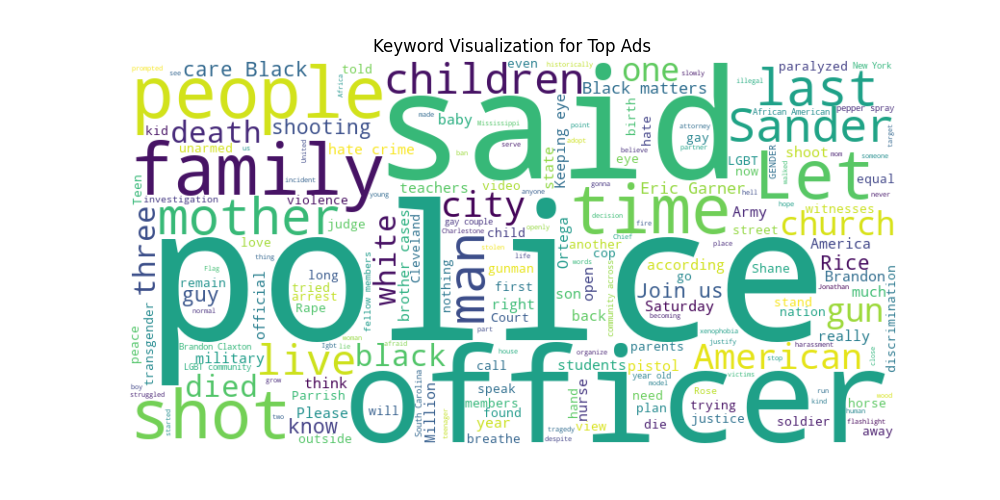

In [20]:
custom_css = """
body {
    font-family: "Montserrat", sans-serif;
    font-size: 16px;
}
"""

# Apply the custom CSS
pn.config.raw_css.append(custom_css)


template = pn.template.FastListTemplate(
    title='SocioLens Dashboard', 
    sidebar=[pn.pane.Markdown("# About the Tool"), 
             pn.pane.Markdown("It is a marketing analytics visualization platform that incorporates data from Twitter and Facebook. The platform will output synthesized reports in PDF format using various python libraries."), 
             ],
    main=[pn.Row(pn.Column(Line_Chart,LCdescription_pane)), 
          pn.Row(pn.Column(Line_Chart1,LC1description)),
          pn.Row(pn.Column(Line_Chart2,LC2description)),
          pn.Row(pn.Column(Bar_Chart,BCdescription_pane)), 
          pn.Row(pn.Column(Area_Chart,ACdescription_pane)),
          pn.Row(pn.Column(Bubble_Chart,BCdescription_pane)),
          pn.Row(pn.Column(Pie_Chart,PCdescription_pane)),
          pn.Row(pn.Column(scatter_plot,SPdescription)),
          pn.Row(pn.Column(Line_Chart3,LC3description_pane)),
          pn.Row(pn.Column(Line_Chart4,LC4description_pane)),
          pn.Row(pn.Column(wordcloud_image_path,WCdescription_pane)),
          pn.Row(pn.Column(Bar_Chart1,BC1description_pane))],
    accent_base_color="#FFFFFF",
    header_background="#000000",
)


# Serve the Panel app
template.servable() 